In [4]:
from google.colab import files

uploaded = files.upload()


Saving data_banknote_authentication.txt to data_banknote_authentication.txt


In [5]:
import pandas as pd


df = pd.read_csv("data_banknote_authentication.txt", header=None,
                 names=["variance", "skewness", "kurtosis", "entropy", "class"])

df.head() #Only for first 5 rows
#To check if the file was read correctly



,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


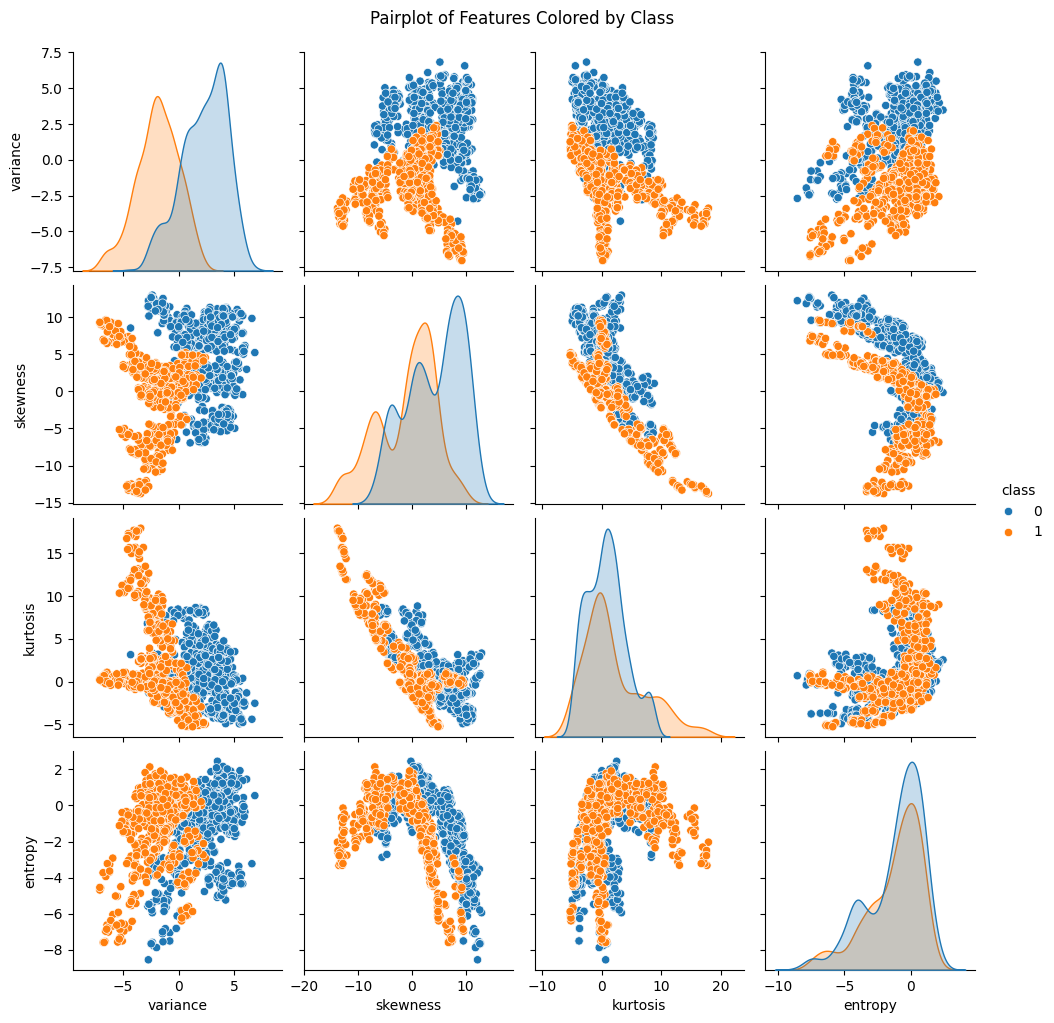

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships in the dataset
sns.pairplot(df, hue="class")
plt.suptitle("Pairplot of Features Colored by Class", y=1.02)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split #data split library

# Separate features (X) and label (y)
X = df.drop("class", axis=1)  # remove the "class" column from the dataset to isolate the input features.The remaining columns (variance, skewness, kurtosis, entropy) are stored in X.
y = df["class"]               # This line selects the "class" column, which represents the target label (0 = fake, 1 = real).

# Split the dataset into training and testing sets (80% train, 20% test) 20% of the data is reserved for testing; 80% is used for training.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

Model A – entropy / depth=None / min_samples_split=2
Classification Report:

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99       153
   Authentic       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



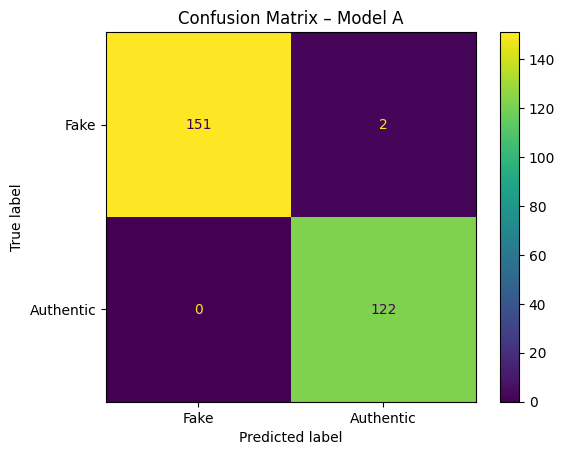

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# A: entropy, max_depth=None, min_samples_split=2
clf_a = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2, random_state=42)
clf_a.fit(X_train, y_train)

# Make predictions
y_pred_a = clf_a.predict(X_test)

# Print classification report
print("Model A – entropy / depth=None / min_samples_split=2")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_a, target_names=["Fake", "Authentic"]))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_a, X_test, y_test, display_labels=["Fake", "Authentic"])
plt.title("Confusion Matrix – Model A")
plt.show()


Model B – entropy / depth=3 / min_samples_split=5
Classification Report:

              precision    recall  f1-score   support

        Fake       1.00      0.90      0.94       153
   Authentic       0.88      1.00      0.94       122

    accuracy                           0.94       275
   macro avg       0.94      0.95      0.94       275
weighted avg       0.95      0.94      0.94       275



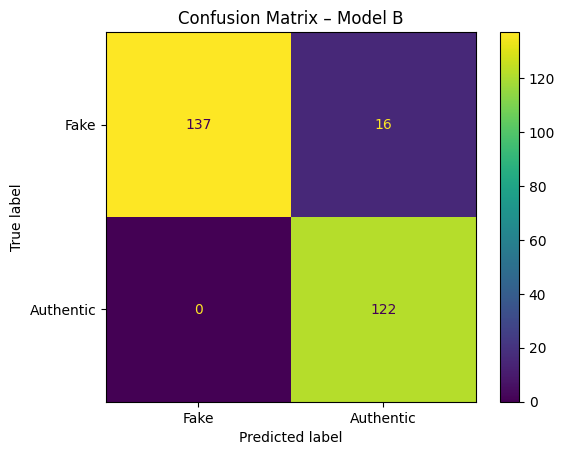

In [10]:
# B: entropy, max_depth=3, min_samples_split=5
clf_b = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=5, random_state=42)
clf_b.fit(X_train, y_train)

# Make predictions
y_pred_b = clf_b.predict(X_test)

# Print classification report
print("Model B – entropy / depth=3 / min_samples_split=5")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_b, target_names=["Fake", "Authentic"]))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_b, X_test, y_test, display_labels=["Fake", "Authentic"])
plt.title("Confusion Matrix – Model B")
plt.show()


Model C – gini / depth=3 / min_samples_split=5
Classification Report:

              precision    recall  f1-score   support

        Fake       0.96      0.90      0.93       153
   Authentic       0.88      0.96      0.92       122

    accuracy                           0.92       275
   macro avg       0.92      0.93      0.92       275
weighted avg       0.93      0.92      0.92       275



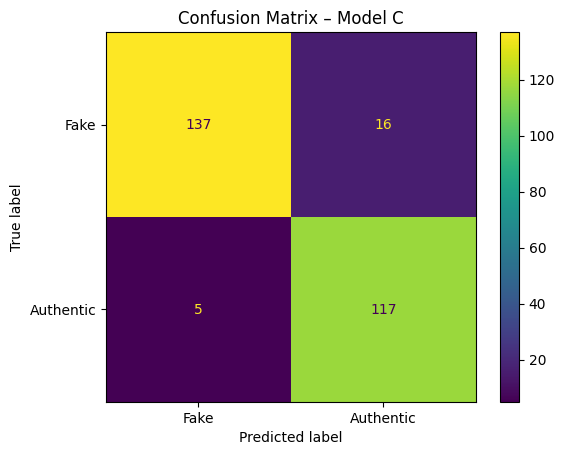

In [11]:
# C: gini, max_depth=3, min_samples_split=5
clf_c = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=5, random_state=42)
clf_c.fit(X_train, y_train)

# Make predictions
y_pred_c = clf_c.predict(X_test)

# Print classification report
print("Model C – gini / depth=3 / min_samples_split=5")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_c, target_names=["Fake", "Authentic"]))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_c, X_test, y_test, display_labels=["Fake", "Authentic"])
plt.title("Confusion Matrix – Model C")
plt.show()


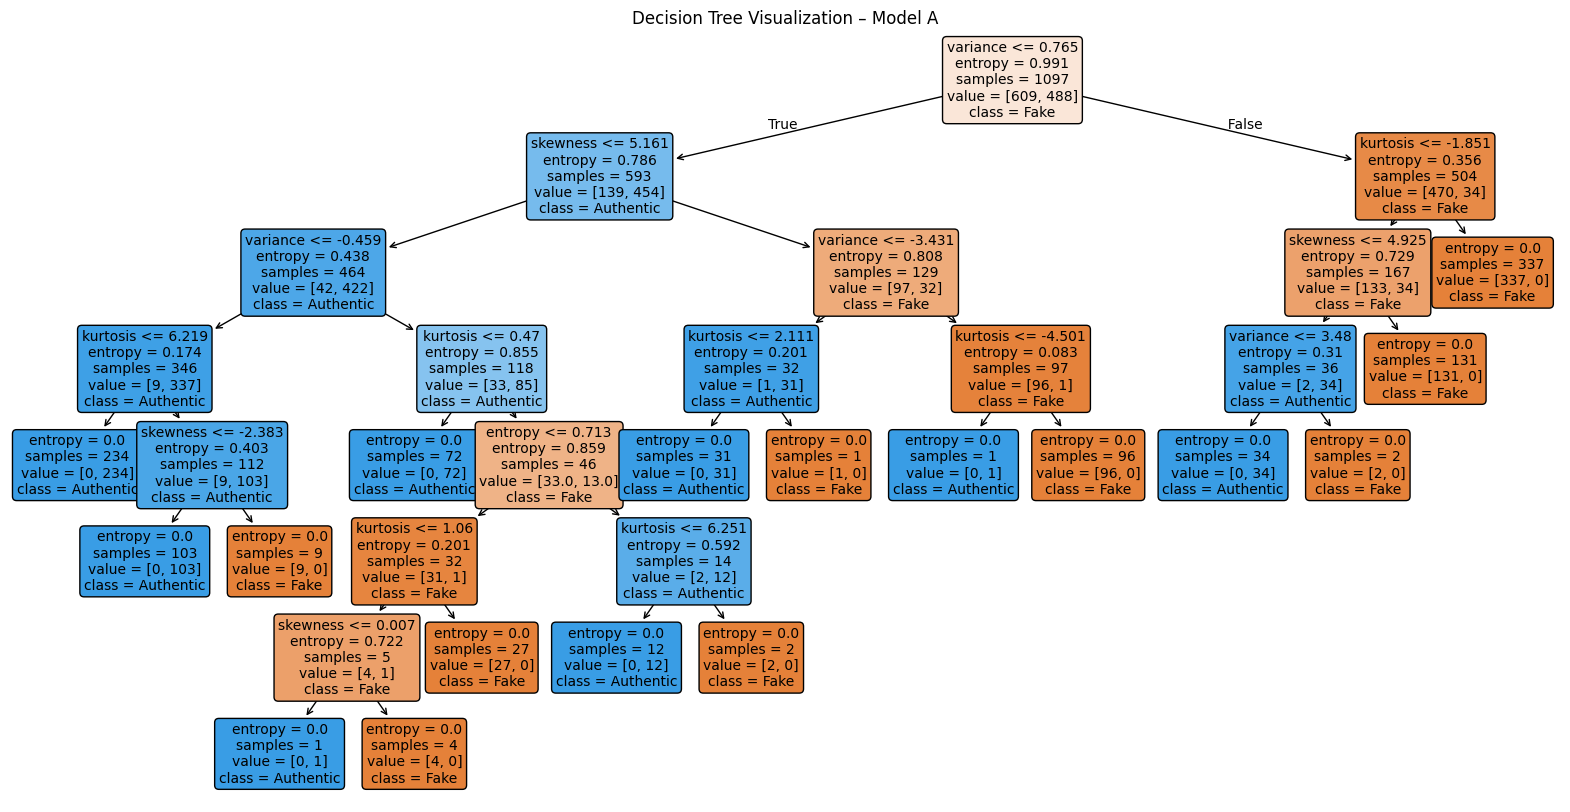

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree (for Model A)
plt.figure(figsize=(20, 10))
plot_tree(clf_a,
          feature_names=X.columns,
          class_names=["Fake", "Authentic"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization – Model A")
plt.show()


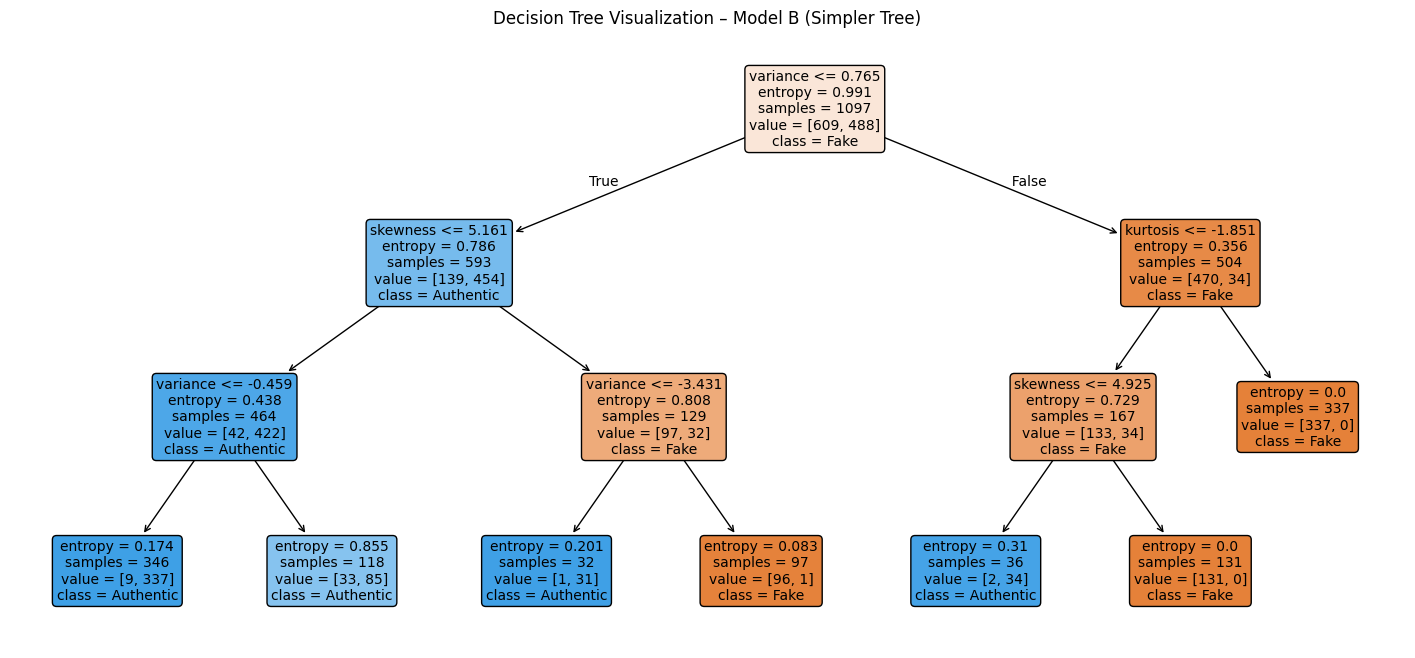

In [13]:
plt.figure(figsize=(18, 8))
plot_tree(clf_b,
          feature_names=X.columns,
          class_names=["Fake", "Authentic"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization – Model B (Simpler Tree)")
plt.show()


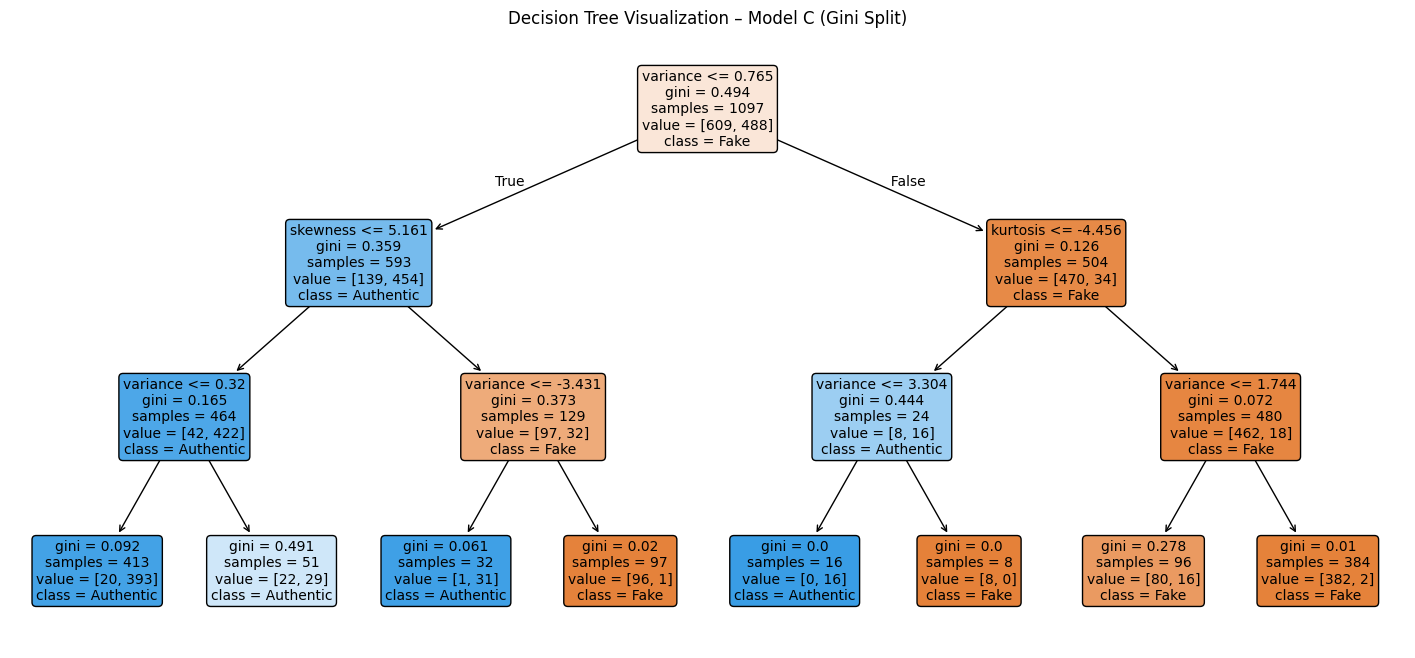

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Model C – Gini criterion
clf_c = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_split=5,
    random_state=42
)
clf_c.fit(X_train, y_train)

# Plot the decision tree for Model C
plt.figure(figsize=(18, 8))
plot_tree(
    clf_c,
    feature_names=X.columns,
    class_names=["Fake", "Authentic"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization – Model C (Gini Split)")
plt.show()


In [15]:
import pandas as pd

# Get feature importances from Model B
importances = clf_b.feature_importances_

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print the table
print(feat_importance_df)


    Feature  Importance
0  variance    0.637210
1  skewness    0.298549
2  kurtosis    0.064241
3   entropy    0.000000
